In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix
#for the 2nd part
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
#for the 2nd part
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading the images
images = np.load("smiley_dataset/smiley_X.npy")#noiseless dataset
images2 = np.load("smiley_dataset/smiley_noisy_X.npy") #noisy Dataset

In [3]:
#loading the classes
classes = np.load("smiley_dataset/smiley_Y.npy") #class for noiseless Dataset
classes2 = np.load("smiley_dataset/smiley_noisy_Y.npy") #Class for noisy Dataset

In [4]:
print("Images shape:", images.shape) #printing the noiseless dataset
print("Images2 shape:", images2.shape)#printing the noisy dataset

Images shape: (204, 9, 9, 1)
Images2 shape: (204, 9, 9, 1)


# the shape of the dataset as printed above, tells it is a 4-dimensional numpy array with 204 samples, 9 height, 9 width and 1 channel(implying a grayscale)

In [5]:
print(classes)#printing labels for the noiseless dataset
print(classes2)#printing labels for the noisy dataset

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

In [6]:
#verifying the number of unique classes with their corresponding leabels
# Get the unique classes and their counts
unique_classes, class_counts = np.unique(classes, return_counts=True)
# Print the unique classes and their counts
for class_label, count in zip(unique_classes, class_counts):
    print("Class:", class_label, "Count:", count)
    
print("\n for noisy dataset \n")    
unique_noisy_classes, noisy_class_counts = np.unique(classes2, return_counts=True)
# Print the unique classes and their counts
for noisy_class_label, count in zip(unique_noisy_classes, noisy_class_counts):
    print("Class:", noisy_class_label, "Count:", count)


Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72

 for noisy dataset 

Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72


# the result from the above cell indicates that the both the noisy and noiseless dataset contain 72 images, 60 images and 72 images which belong to sad, neutral and happpy respectively

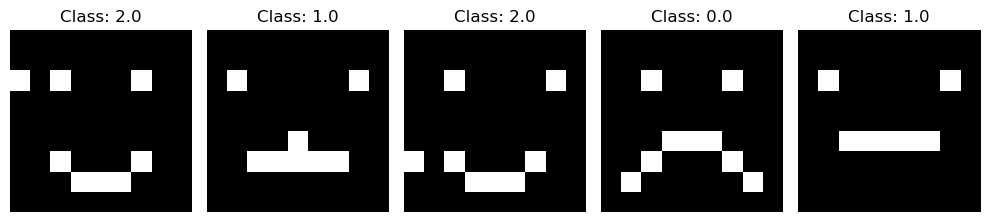

In [7]:
# Selecting some random from the noisy dataset for visualization
indices = np.random.choice(len(images2), size=5, replace=False)

# Ploting the selected images 
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(images[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {classes[index]}")
    axes[i].axis('off')#turning off axis labels for cleaner display
plt.tight_layout()
plt.show()

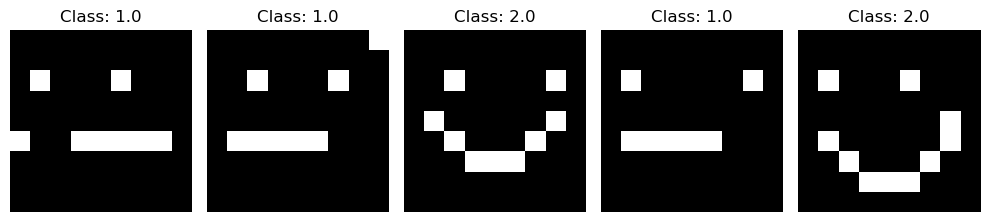

In [8]:

# Selecting some random indices from the noiseless dataset for visualization
indices = np.random.choice(len(images), size=5, replace=False)

# Plot the selected images
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(images[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {classes[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Results from the two cell above show visualization of 5 random images from the datasets(noiseless and noisy) which seem to match their corresponding classes

In [9]:
# Splitting the datasets into training and testing sets
img_train, img_test, cl_train, cl_test = train_test_split(images, classes, test_size=0.2, random_state=42)
img_noisy_train, img_noisy_test, cl_noisy_train, cl_noisy_test = train_test_split(images2, classes2, test_size=0.2, random_state=42)

In [10]:
# Create an instance of the Naïve Bayes classifier
naive_bayes = GaussianNB()

In [11]:
# Train the classifier on the training sets
naive_bayes.fit(img_train.reshape(img_train.shape[0], -1), cl_train)
naive_bayes.fit(img_noisy_train.reshape(img_noisy_train.shape[0], -1), cl_noisy_train)



GaussianNB()

In [12]:
# Reshape the testing set to match the input format
img_test_reshaped = img_test.reshape(img_test.shape[0], -1)
img_noisy_test_reshaped = img_noisy_test.reshape(img_noisy_test.shape[0], -1)

In [13]:
# Make predictions on the testing set
cl_pred = naive_bayes.predict(img_test_reshaped)
cl_noisy_pred = naive_bayes.predict(img_noisy_test_reshaped)


In [24]:

# Calculate and print the accuracy
accuracy = accuracy_score(cl_test, cl_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5853658536585366


In [25]:
# Generate and print the confusion matrix
confusion_mat = confusion_matrix(cl_test, cl_pred)
print("Confusion Matrix:\n", confusion_mat)

Confusion Matrix:
 [[ 8  6  1]
 [ 2  6  1]
 [ 0  7 10]]


In [22]:

# Calculate and print TP rate, FP rate, precision, recall, and F measure
tp_rate = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[1, 0])
fp_rate = confusion_mat[0, 1] / (confusion_mat[0, 1] + confusion_mat[0, 0])
precision = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[0, 1])
recall = tp_rate
f_measure = 2 * (precision * recall) / (precision + recall)




In [23]:

print("TP Rate:", tp_rate)
print("FP Rate:", fp_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F Measure:", f_measure)



TP Rate: 0.75
FP Rate: 0.42857142857142855
Precision: 0.5
Recall: 0.75
F Measure: 0.6


In [27]:
# Calculate and print ROC area
if len(unique_classes) == 2:  # Binary classification
    roc_area = roc_auc_score(cl_test, cl_pred)
else:  # Multi-class classification
    cl_prob = naive_bayes.predict_proba(img_test_reshaped)
    roc_area = roc_auc_score(cl_test, cl_prob, multi_class='ovr')
print("ROC Area:", roc_area)



ROC Area: 0.779325351935646


# Discusion for the metrics
#from the results of the metrics calculated above,
Accuracy of 0.5853658536585366 suggest that 58.54 samples were correctly classified
True Positive Rate of 0.75 indicates that 75% of the images were identified correctly
False Positive Rate of 0.42857142857142855 implies that 42% of the times it avoids misclassifying negative samples as positive
precision of 0.5 means that the classifier has mad a 50% positive prediction of correct classification


In [29]:
# Verify the number of samples and the shape of the images and classes arrays
print("Images shape:", images.shape)
print("Classes shape:", classes.shape)

# Verify the unique class labels in the 'classes' array
unique_classes_in_classes = np.unique(classes)
print("Unique Class Labels in 'classes':", unique_classes_in_classes)

# Print 'class_indices' for each class to identify the issue
for class_label in unique_classes:
    class_indices = np.where(classes == class_label)[0]
    print(f"Class: {class_label}, class_indices:", class_indices)


# Reshape the images into a 2D array (num_samples, num_pixels)
num_samples, img_height, img_width, num_channels = images.shape
images_reshaped = images.reshape(num_samples, img_height * img_width * num_channels)

# Step 1: Identify Correlating Features
correlation_matrix = np.corrcoef(images_reshaped, rowvar=False)
print("Correlation Matrix Shape:", correlation_matrix.shape)

top_features_per_class = []
N = 3  # Number of top features to select for each class

for class_label in unique_classes:
    class_indices = np.where(classes == class_label)[0]
    print(f"Class: {class_label}, Number of Samples: {len(class_indices)}")

    # Check if there are enough samples for the class before computing correlation
    if len(class_indices) >= N:
        try:
            class_corr_values = np.mean(correlation_matrix[class_indices], axis=0)
            top_features_indices = np.argsort(class_corr_values)[-N:][::-1]
            top_features_per_class.append(top_features_indices)
        except IndexError as e:
            print("Error:", e)
    else:
        print(f"Class {class_label} has insufficient samples for correlation calculation.")

Images shape: (204, 9, 9, 1)
Classes shape: (204,)
Unique Class Labels in 'classes': [0. 1. 2.]
Class: 0.0, class_indices: [ 44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203]
Class: 1.0, class_indices: [ 24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179]
Class: 2.0, class_indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 1

In [ ]:
#THIS IS THE BEGINING OF THE SECOND PART OF THE ASSIGNMENT
#PART TWO BEGINS HERE
evaluation_scores = []
images_2d = images.reshape(images.shape[0], -1)


In [ ]:
# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the k-means algorithm to the data
kmeans.fit(images_2d)


In [ ]:
# Get the predicted cluster labels for the samples
cluster_labels = kmeans.labels_

In [ ]:
# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Define the image dimensions
image_height = 9
image_width = 9

# Plot the cluster centers
plt.figure(figsize=(8, 3))
for i, center in enumerate(cluster_centers):
    plt.subplot(1, len(cluster_centers), i + 1)
    plt.imshow(center.reshape((image_height, image_width)), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i+1}')
plt.tight_layout()
plt.show()


In [ ]:


# Calculate the ARI between the cluster labels and the ground truth labels
kmeans_ari = adjusted_rand_score(classes, cluster_labels)
print("Adjusted Rand Index (ARI):", kmeans_ari)


In [ ]:
#implemeningt NMI for Kmeans clustering
kmeans_nmi = normalized_mutual_info_score(classes, cluster_labels)
#print the NMI score
print("NMI SCORe:", kmeans_nmi)

In [ ]:
# Store the scores for K-means
kmeans_scores = {
    "ARI": kmeans_ari,
    "NMI": kmeans_nmi
}
evaluation_scores.append(("K-means", kmeans_scores))


In [ ]:
#implementing EM cLustering using GMM

# Create an instance of the GaussianMixture algorithm
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the GMM to the data
gmm.fit(images_2d)

# Get the cluster labels
gmm_labels = gmm.predict(images_2d)

# Calculate the ARI for the GMM clustering
gmm_ari = adjusted_rand_score(classes, gmm_labels)

# Print the ARI score
print("Adjusted Rand Index (ARI):", gmm_ari)

In [ ]:
#implemeningt NMI for GMM clustering
gmm_nmi = normalized_mutual_info_score(classes, gmm_labels)
#print the NMI score
print("NMI SCORE:", gmm_nmi)

In [ ]:
# Store the scores for GMM
gmm_scores = {
    "ARI": gmm_ari,
    "NMI": gmm_nmi
}
evaluation_scores.append(("GMM", gmm_scores))

In [ ]:
#implementing Hierarchical Clustering
# Create an instance of the AgglomerativeClustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3)

# Fit the hierarchical clustering algorithm to the data
hierarchical.fit(images_2d)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_
# Calculate the ARI for the hierarchical clustering
hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
print("Evaluation Metric Score:", hierarchical_ari)

In [ ]:
#implemeningt NMI for HIERARCHICAL clustering
hierarchical_nmi = normalized_mutual_info_score(classes, hierarchical_labels)
#print the NMI score
print("NMI SCORE:", hierarchical_nmi)

In [ ]:
# Store the scores for Hierarchical clustering
hierarchical_scores = {
    "ARI": hierarchical_ari,
    "NMI": hierarchical_nmi
}
evaluation_scores.append(("Hierarchical", hierarchical_scores))

In [ ]:
# Accessing the scores for K-means
kmeans_scores = evaluation_scores[0][1]
kmeans_ari = kmeans_scores["ARI"]
kmeans_nmi = kmeans_scores["NMI"]
print(kmeans_ari)

In [ ]:
for num_clusters in range(2,10):
    kmeans = KMeans(n_clusters = num_clusters,n_init = 10, random_state = 42)
    kmeans.fit(images_2d)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(images_2d, cluster_labels)
    kmeans_ari = adjusted_rand_score(classes, cluster_labels)
    print(f"Number of Clusters:{num_clusters}\t Silhouette Score:{silhouette_avg}\t ARI:{kmeans_ari}")

In [ ]:


# Check the number of unique labels
num_unique_labels = len(set(classes))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Loop over different numbers of clusters
    for num_clusters in range(2, 10):
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(images_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(images_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(classes, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(classes, kmeans_labels)
        print(f"K-means: Number of Clusters: {num_clusters}\t Silhouette Score: {kmeans_silhouette}\t ARI: {kmeans_ari}\t NMI Score:{kmeans_nmi}")
        
        #Em clustering using GMM
        gmm = GaussianMixture(n_components = 3, random_state=42)
        gmm.fit(images_2d)
        gmm_labels = gmm.predict(images_2d)
        gmm_silhouette =  silhouette_score(images_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(classes, gmm_labels)
        print(f"EM Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {gmm_silhouette}\t ARI: {gmm_ari}")
        
        
        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(images_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(images_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
        print(f"Hierarchical Clustering: Number of Clusters: {num_clusters}\t Silhouette Score: {hierarchical_silhouette}\t ARI: {hierarchical_ari}\n ")

        

In [ ]:
# Create a list of algorithm names and evaluation scores
algorithm_names, scores = zip(*evaluation_scores)

# Get the evaluation metric names (e.g., ARI, NMI)
metric_names = list(evaluation_scores[0][1].keys())

# Set the position of the bars on the x-axis
x = np.arange(len(algorithm_names))

# Set the width of the bars
bar_width = 0.2

# Create subplots for each evaluation metric
fig, ax = plt.subplots()
for i, metric_name in enumerate(metric_names):
    # Calculate the position of each bar
    pos = x + (i - len(metric_names) / 2) * bar_width

    # Get the scores for the current evaluation metric
    metric_scores = [score[1][metric_name] for score in evaluation_scores]

    # Plot the bars for the current evaluation metric
    ax.bar(pos, metric_scores, bar_width, label=metric_name)

# Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(algorithm_names)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Evaluation Metric Score')
plt.title('Comparison of Clustering Algorithms')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:

# Check the number of unique labels
num_unique_labels = len(set(classes))
if num_unique_labels < 2:
    print("Error: Number of unique labels is less than 2. Unable to compute evaluation metrics.")
else:
    # Define the range of clusters to explore
    num_clusters_range = range(2, 10)

    # Initialize lists to store evaluation metric scores
    kmeans_silhouette_scores = []
    kmeans_ari_scores = []
    kmeans_nmi_scores=[]
    gmm_silhouette_scores = []
    gmm_ari_scores = []
    gmm_nmi_scores=[]
    hierarchical_silhouette_scores = []
    hierarchical_ari_scores = []
    hierarchical_nmi_scores=[]

    # Loop over different numbers of clusters
    for num_clusters in num_clusters_range:
        # K-means
        kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=42)
        kmeans.fit(images_2d)
        kmeans_labels = kmeans.labels_
        kmeans_silhouette = silhouette_score(images_2d, kmeans_labels)
        kmeans_ari = adjusted_rand_score(classes, kmeans_labels)
        kmeans_nmi = normalized_mutual_info_score(classes, kmeans_labels)
        kmeans_silhouette_scores.append(kmeans_silhouette)
        kmeans_ari_scores.append(kmeans_ari)
        kmeans_nmi_scores.append(kmeans_nmi)

        # EM clustering using GMM
        gmm = GaussianMixture(n_components=num_clusters, random_state=42)
        gmm.fit(images_2d)
        gmm_labels = gmm.predict(images_2d)
        gmm_silhouette = silhouette_score(images_2d, gmm_labels)
        gmm_ari = adjusted_rand_score(classes, gmm_labels)
        gmm_nmi = normalized_mutual_info_score(classes, gmm_labels)
        gmm_silhouette_scores.append(gmm_silhouette)
        gmm_ari_scores.append(gmm_ari)
        gmm_nmi_scores.append(gmm_nmi)

        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
        hierarchical.fit(images_2d)
        hierarchical_labels = hierarchical.labels_
        hierarchical_silhouette = silhouette_score(images_2d, hierarchical_labels)
        hierarchical_ari = adjusted_rand_score(classes, hierarchical_labels)
        hierarchical_nmi = normalized_mutual_info_score(classes, hierarchical_labels)
        hierarchical_silhouette_scores.append(hierarchical_silhouette)
        hierarchical_ari_scores.append(hierarchical_ari)
        hierarchical_nmi_scores.append(hierarchical_nmi)

    # Visualize Silhouette Scores
    plt.plot(num_clusters_range, kmeans_silhouette_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_silhouette_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_silhouette_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.title('Silhouette Scores for Different Clustering Algorithms')
    plt.show()

    # Visualize ARI Scores
    plt.plot(num_clusters_range, kmeans_ari_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_ari_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_ari_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Adjusted Rand Index (ARI)')
    plt.legend()
    plt.title('Adjusted Rand Index (ARI) for Different Clustering Algorithms')
    plt.show()
    
    # Visualize NMI Scores
    plt.plot(num_clusters_range, kmeans_nmi_scores, label='K-means')
    plt.plot(num_clusters_range, gmm_nmi_scores, label='GMM')
    plt.plot(num_clusters_range, hierarchical_nmi_scores, label='Hierarchical')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Normalized Mutual Info (NMI)')
    plt.legend()
    plt.title('Normalized Mutual Info (NMI) for Different Clustering Algorithms')
    plt.show()

    # Draw Conclusions
    best_kmeans_num_clusters = num_clusters_range[kmeans_silhouette_scores.index(max(kmeans_silhouette_scores))]
    best_gmm_num_clusters = num_clusters_range[gmm_silhouette_scores.index(max(gmm_silhouette_scores))]
    best_hierarchical_num_clusters = num_clusters_range[hierarchical_silhouette_scores.index(max(hierarchical_silhouette_scores))]
    
    print(f"Best number of clusters for K-means: {best_kmeans_num_clusters}")
    print(f"Best number of clusters for GMM: {best_gmm_num_clusters}")
    print(f"Best number of clusters for Hierarchical: {best_hierarchical_num_clusters}")


In [ ]:
#the 3rd part of the assignment proceeds on the next cell

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
#reshaping the input features
num_samples, image_height, image_width, num_channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, image_height * image_width * num_channels)

k = 10  # Number of folds for cross-validation
scores = cross_val_score(clf, X_train_reshaped, y_train, cv=k)

In [ ]:
print("Accuracy scores for each fold:")
print(scores)
print("Mean accuracy:", scores.mean())


In [ ]:
# Reshape the training set
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Reshape the test set
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier to the training data
clf.fit(X_train_reshaped, y_train)

# Use the fitted classifier to predict the labels for the test set
y_pred = clf.predict(X_test_reshaped)

# Calculate the accuracy of the classifier's predictions on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)


In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


In [ ]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Experiment with different parameters
parameters = [
    {"max_depth": 3},
    {"min_impurity_decrease": 0.01},
    {"criterion": "entropy"},
    {"min_samples_leaf": 5},
    {"ccp_alpha": 0.1}
]

# Loop over the parameters
for params in parameters:
    # Set the parameters for the classifier
    clf.set_params(**params)

    # Fit the classifier on the training set
    clf.fit(X_train_reshaped, y_train)

    # Predict on the training set and calculate metrics
    y_train_pred = clf.predict(X_train_reshaped)
    train_confusion_mat = confusion_matrix(y_train, y_train_pred)
    train_TP = train_confusion_mat[1, 1]
    train_FP = train_confusion_mat[0, 1]
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')

    # Predict on the test set and calculate metrics
    y_test_pred = clf.predict(X_test_reshaped)
    test_confusion_mat = confusion_matrix(y_test, y_test_pred)
    test_TP = test_confusion_mat[1, 1]
    test_FP = test_confusion_mat[0, 1]
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    # Print the results
    print("Parameters:", params)
    print("Training Set:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("TP:", train_TP)
    print("FP:", train_FP)
    print("F1 Score:", train_f1)
    print("Test Set:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("TP:", test_TP)
    print("FP:", test_FP)
    print("F1 Score:", test_f1)
    print("---------------------")

In [ ]:
#The following cell contains the requirement for the 5th sub-part of the 3rd prt

In [ ]:
#reshaping the imput data to have two dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Create a new training set and testing set with 30% instances in the testing set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train_reshaped,y_train, test_size=0.3, random_state=42)

# Fit the decision tree classifier on the new training set
clf.fit(X_train_new, y_train_new)

# Evaluate accuracy on the training set
y_train_pred_new = clf.predict(X_train_new)
train_accuracy_new = accuracy_score(y_train_new, y_train_pred_new)

# Evaluate accuracy on the testing set
y_test_pred_new = clf.predict(X_test_new)
test_accuracy_new = accuracy_score(y_test_new, y_test_pred_new)

# Print the accuracies
print("Accuracies for 30% instances in testing set:")
print("Training Accuracy:", train_accuracy_new)
print("Testing Accuracy:", test_accuracy_new)

# Create a new training set and testing set with 60% instances in the testing set
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_train_reshaped, y_train, test_size=0.6, random_state=42)

# Fit the decision tree classifier on the new training set
clf.fit(X_train_new2, y_train_new2)

# Evaluate accuracy on the training set
y_train_pred_new2 = clf.predict(X_train_new2)
train_accuracy_new2 = accuracy_score(y_train_new2, y_train_pred_new2)

# Evaluate accuracy on the testing set
y_test_pred_new2 = clf.predict(X_test_new2)
test_accuracy_new2 = accuracy_score(y_test_new2, y_test_pred_new2)

# Print the accuracies
print("Accuracies for 60% instances in testing set:")
print("Training Accuracy:", train_accuracy_new2)
print("Testing Accuracy:", test_accuracy_new2)

In [ ]:

#random forest clasifier

#reshaping the imput data to have two dimensions
images_train_reshaped = images.reshape(images.shape[0], -1)
images_test_reshaped = images_test.reshape(images_test.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(images_train_reshaped,classes,test_size = 0.2, random_state = 42)

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(images_train_reshaped, classes)

In [ ]:
y_train_pred_rf = rf_classifier.predict(images_train_reshaped)
train_accuracy_rf = accuracy_score(classes, y_train_pred_rf)
train_precision_rf = precision_score(classes, y_train_pred_rf, average='macro')
train_recall_rf = recall_score(classes, y_train_pred_rf, average='macro')
train_f1_rf = f1_score(classes, y_train_pred_rf, average='macro')
# Evaluate other metrics as required

y_test_pred_rf = rf_classifier.predict(images_test_reshaped)
test_accuracy_rf = accuracy_score(classes, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
# Evaluate other metrics as required

# Print the results
print("Random Forest Classifier - Original Training Set:")
print("Accuracy:", train_accuracy_rf)
print("Precision:", train_precision_rf)
print("Recall:", train_recall_rf)
print("F1 Score:", train_f1_rf)

print("Random Forest Classifier - Test Set:")
print("Accuracy:", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1 Score:", test_f1_rf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Reshape the input data to have two dimensions
images_train_reshaped = images.reshape(images.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_train_reshaped, classes, test_size=0.2, random_state=42)

# Create and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict on the training set and calculate metrics
y_train_pred_rf = rf_classifier.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='macro')
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='macro')
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='macro')
train_confusion_matrix_rf = confusion_matrix(y_train, y_train_pred_rf)
train_tp_rf = train_confusion_matrix_rf.diagonal()
train_fp_rf = train_confusion_matrix_rf.sum(axis=0) - train_tp_rf

# Predict on the test set and calculate metrics
y_test_pred_rf = rf_classifier.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')
test_confusion_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
test_tp_rf = test_confusion_matrix_rf.diagonal()
test_fp_rf = test_confusion_matrix_rf.sum(axis=0) - test_tp_rf

# Print the results
print("Random Forest Classifier - Training Set:")
print("Accuracy:", train_accuracy_rf)
print("Precision:", train_precision_rf)
print("Recall:", train_recall_rf)
print("F1 Score:", train_f1_rf)
print("TP:", train_tp_rf)
print("FP:", train_fp_rf)

print("Random Forest Classifier - Test Set:")
print("Accuracy:", test_accuracy_rf)
print("Precision:", test_precision_rf)
print("Recall:", test_recall_rf)
print("F1 Score:", test_f1_rf)
print("TP:", test_tp_rf)
print("FP:", test_fp_rf)


In [ ]:
#This part is for the 4th part of the assignment

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Reshape the input data to have two dimensions
images_train_reshaped = images.reshape(images.shape[0], -1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images_train_reshaped, classes, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear classifier
linear_clf = LinearRegression()

# Fit the classifier on the training set
linear_clf.fit(X_train, y_train)

# Predict on the training set and calculate accuracy
y_train_pred_linear = linear_clf.predict(X_train)
train_accuracy_linear = accuracy_score(y_train, y_train_pred_linear.round())

# Predict on the test set and calculate accuracy
y_test_pred_linear = linear_clf.predict(X_test)
test_accuracy_linear = accuracy_score(y_test, y_test_pred_linear.round())

# Print the accuracies
print("Linear Classifier - Training Set (without cross-validation):")
print("Accuracy:", train_accuracy_linear)

print("Linear Classifier - Test Set (without cross-validation):")
print("Accuracy:", test_accuracy_linear)


In [ ]:
# Initialize the Linear classifier
linear_clf_cv = LinearRegression()

# Perform cross-validation and calculate the accuracies
cv_scores = cross_val_score(linear_clf_cv, X_train, y_train, cv=10)
cv_accuracy_mean = cv_scores.mean()

# Print the cross-validation accuracy
print("Linear Classifier - Cross-Validation Accuracy:")
print("Mean Accuracy:", cv_accuracy_mean)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the MLP classifier
mlp_clf = MLPClassifier(max_iter =500)

# Define the parameter grid for grid search
param_grid = {
    'activation': ['relu', 'tanh'],
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(mlp_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best MLP classifier
best_params = grid_search.best_params_
best_mlp_clf = grid_search.best_estimator_

# Fit the best MLP classifier on the training set
best_mlp_clf.fit(X_train, y_train)

# Predict on the training set and calculate accuracy
y_train_pred_mlp = best_mlp_clf.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, y_train_pred_mlp)

# Predict on the test set and calculate accuracy
y_test_pred_mlp = best_mlp_clf.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp)

# Print the results
print("Multilayer Perceptron (MLP) - Best Parameters:")
print(best_params)

print("Multilayer Perceptron (MLP) - Training Set:")
print("Accuracy:", train_accuracy_mlp)

print("Multilayer Perceptron (MLP) - Test Set:")
print("Accuracy:", test_accuracy_mlp)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from skimage.transform import resize


#Defining the image size
img_width = 100
img_height = 100
img_channels = 1
num_classes = 3

# Resize the images to (100, 100)
images_train_resized = [resize(img, (100, 100)) for img in images_train]

# Convert the resized images to a numpy array and add a channel dimension
images_train_reshaped = np.array(images_train_resized).reshape(-1, 100, 100, 1)


print("train image reshaped size",images_train_reshaped.shape)
print("test image reshaped size",images_test_reshaped.shape)

images_train_reshaped = images_train_reshaped.reshape(-1, 100, 100, 1)
images_test_reshaped = images_test_reshaped.reshape(-1, 100, 100, 1)





y_train_categorical = classes
# Define and compile the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channels)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# Train the CNN model
cnn_model.fit(images_train_reshaped, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the CNN model on the test set
test_loss, test_accuracy_cnn = cnn_model.evaluate(images_test_reshaped, y_test_categorical)

# Print the test accuracy for CNN
print("Convolutional Neural Network (CNN) - Test Set Accuracy:")
print("Accuracy:", test_accuracy_cnn)


In [ ]:
pip install skimage